In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading  data
titanic_data = pd.read_csv('tested.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic_data.shape

(418, 12)

In [7]:
#getting data info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#Analysing data

<Axes: xlabel='Survived', ylabel='count'>

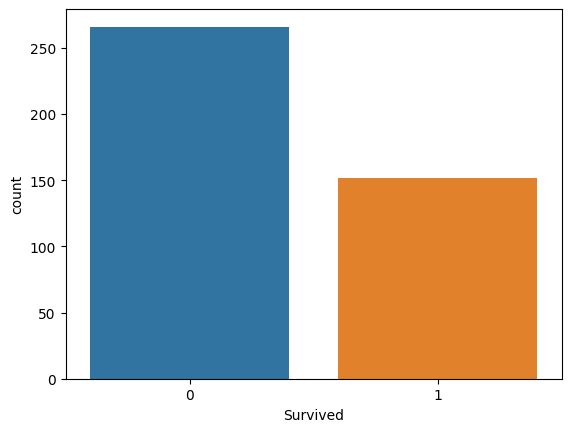

In [9]:
#survived not-survived ratio
sns.countplot(x='Survived', data = titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

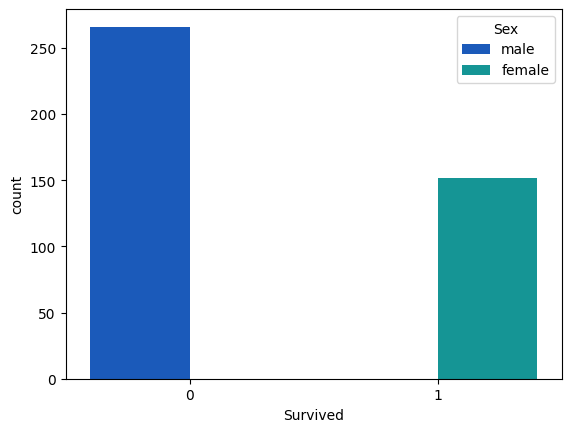

In [10]:
#survived not-survived ratio based on sex
sns.countplot(x='Survived', hue='Sex', data = titanic_data, palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

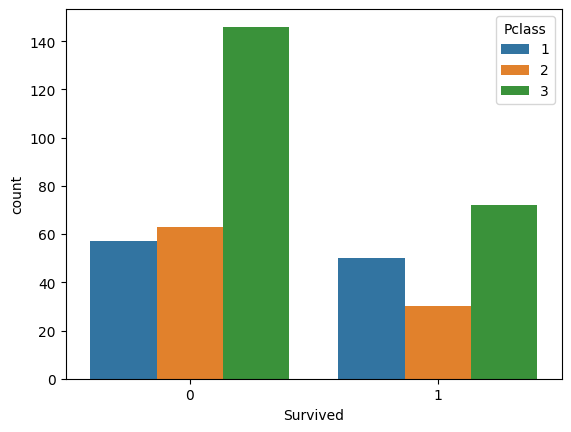

In [11]:
sns.countplot(x='Survived', hue='Pclass', data = titanic_data)

<Axes: ylabel='Frequency'>

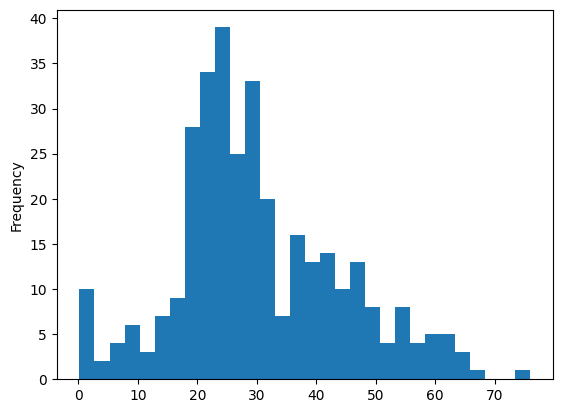

In [12]:
titanic_data['Age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

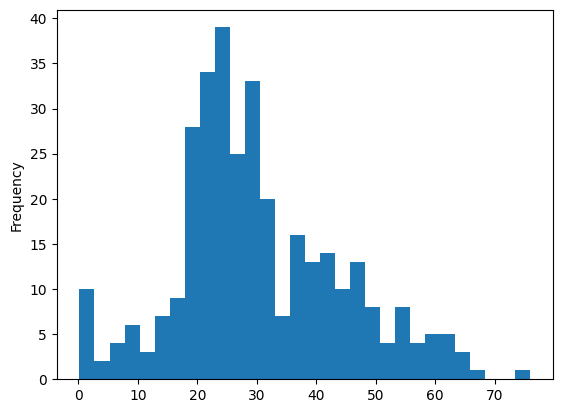

In [13]:
titanic_data['Age'].plot.hist(bins=30)

<Axes: >

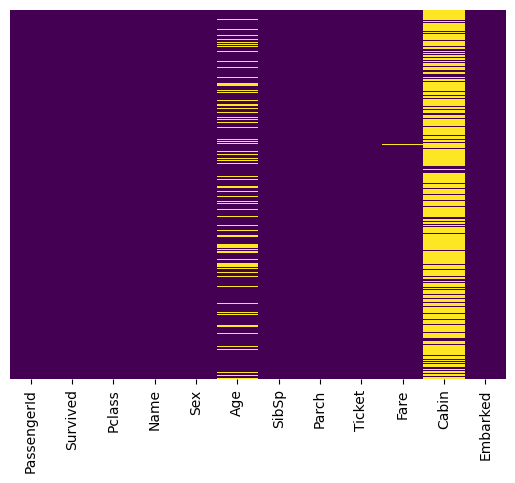

In [14]:
#creating heat map to see missing data
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

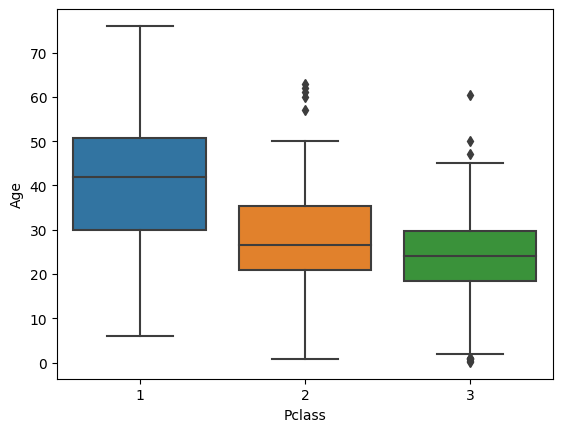

In [15]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [16]:
#finding mean age based on PClass
mage_pclass1 = titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
mage_pclass2 = titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
mage_pclass3 = titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
print(mage_pclass1,mage_pclass2,mage_pclass3)

40.91836734693877 28.7775 24.02794520547945


In [17]:
#filling null values in age column
    
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 40
        elif Pclass == 2:
            return 29
        else:
            return 25
    
    else:
        return Age

In [18]:
#applying the values(mean) in the data
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_age, axis=1)
titanic_data['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    25.0
414    39.0
415    38.5
416    25.0
417    25.0
Name: Age, Length: 418, dtype: float64

<Axes: >

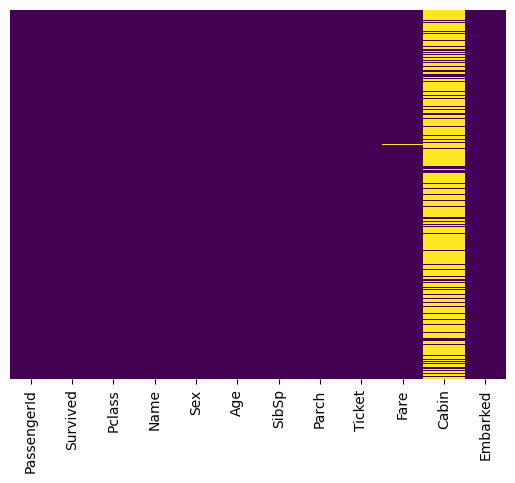

In [19]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
#Dropping Cabin column beacuse most of the data are missing
titanic_data.drop('Cabin', axis=1, inplace=True)

In [21]:
#removing remaining null values
cleaned_data = titanic_data.dropna() 
cleaned_data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: ylabel='Frequency'>

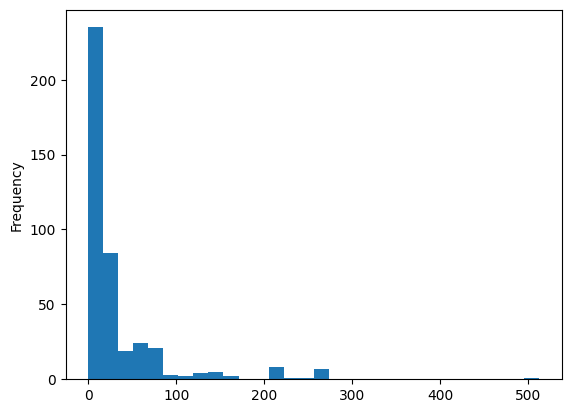

In [22]:
cleaned_data['Fare'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

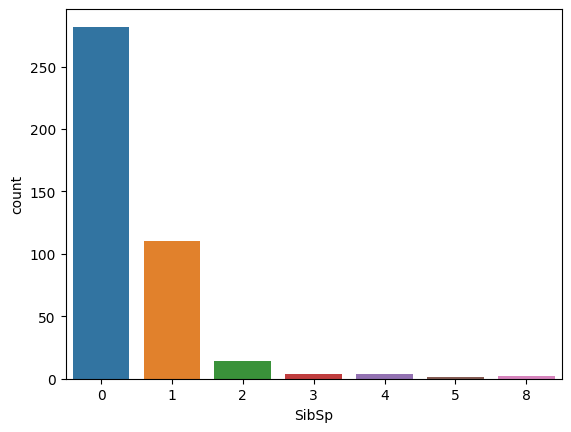

In [23]:
sns.countplot(x='SibSp', data=cleaned_data)

In [24]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [25]:
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [36]:
#converting the string data's into 0 and 1
sex = pd.get_dummies(cleaned_data['Sex'], drop_first=True).astype(int)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [37]:
embark = pd.get_dummies(cleaned_data['Embarked'], drop_first=True).astype(int)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [38]:
cleaned_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [39]:
cleaned_data = pd.concat([cleaned_data,sex,embark],axis=1)

In [40]:
cleaned_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1


In [42]:
#removing the unwanted columns
cleaned_data.drop(['Sex', 'Name', 'PassengerId', 'Embarked','Ticket'], axis=1, inplace=True)

In [43]:
cleaned_data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1


In [45]:
#Training data
X = cleaned_data.drop('Survived', axis=1)
y = cleaned_data['Survived']

In [46]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [59]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [61]:
predictions = logmodel.predict(X_test)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        46

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [64]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(y_test, predictions)

array([[80,  0],
       [ 0, 46]], dtype=int64)

In [66]:
#accuracy score
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test, predictions)

1.0